In [29]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from sberav.splits.tests import ClassifierTwoSampleTestBootstrap, KolmogorovSmirnovTwoSamplesTest

from itertools import combinations

In [45]:
data_path = "../../data/preprocessed/"  # features_with_target.csv

transaction_features = pd.read_csv(data_path + "x5_transaction_features.csv", index_col="client_id")
client_features = pd.read_csv(data_path + "x5_client_features.csv", index_col="client_id")
df_target = pd.read_csv("../../data/datasets/x5-retail-hero/uplift_train.csv.gz", index_col="client_id")
df = transaction_features.join(client_features).join(df_target)
df = df[df.age > 0]
df = df[df.age < 110]
print(df.age.min(), df.age.max())
df

1 109


,regular_points_received_mean,regular_points_received_std,regular_points_received_median,regular_points_received_max,regular_points_received_skew,express_points_received_mean,express_points_received_std,express_points_received_median,express_points_received_max,express_points_received_skew,...,percent_of_transactions_in_12_month,age,first_issue_time,first_redeem_time,issue_redeem_delay,F,M,U,treatment_flg,target
client_id,,,,,,,,,,,,,,,,,,,,,
000012768d,6.425000,2.973529,6.85,10.0,-0.355890,0.000,0.000000,0.0,0.0,0.000000,...,2,45,0.336675,0.735365,0.398690,0,0,1,0,1
000036f903,1.715625,1.461401,1.30,7.0,2.367965,1.875,10.439558,0.0,60.0,5.388159,...,10,72,0.015925,0.033211,0.017286,1,0,0,1,1
00010925a5,1.766667,1.139688,1.45,5.8,2.321282,0.000,0.000000,0.0,0.0,0.000000,...,6,83,1.303876,1.428140,0.124264,0,0,1,1,1
0001f552b0,5.260000,9.686334,1.60,39.7,2.953750,0.000,0.000000,0.0,0.0,0.000000,...,4,33,0.238463,1.381198,1.142734,1,0,0,1,1
00020e7b18,15.894444,13.081389,14.60,44.5,0.819229,0.000,0.000000,0.0,0.0,0.000000,...,2,73,0.648549,0.751613,0.103064,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe0abb97,2.466667,3.003701,0.70,7.3,0.703218,0.000,0.000000,0.0,0.0,0.000000,...,1,35,0.648236,0.838325,0.190090,1,0,0,0,0
fffe0ed719,2.330000,2.281542,1.50,8.6,1.531437,0.000,0.000000,0.0,0.0,0.000000,...,4,69,0.448229,0.671819,0.223590,0,0,1,0,1
fffea1204c,1.535294,1.710845,0.90,5.9,1.563107,0.000,0.000000,0.0,0.0,0.000000,...,4,73,0.827236,0.918646,0.091409,1,0,0,0,1


In [46]:
control = df[df.treatment_flg == 0]
target = df[df.treatment_flg == 1]

columns = df.columns.difference(['treatment_flg', 'target', 'gender', 'client_id'])

In [47]:
def c2st(control, target):
    test = ClassifierTwoSampleTestBootstrap(significance_level=0.05, 
                                            bootstraps=1_000, 
                                            verbose=1, 
                                            n_jobs=1, 
                                            threads=-1)
    columns = df.columns.difference(['treatment_flg', 'target', 'gender', 'client_id'])
    test.validate(control, target)
    return stats.ks_2samp(test.losses, test.emp_losses)

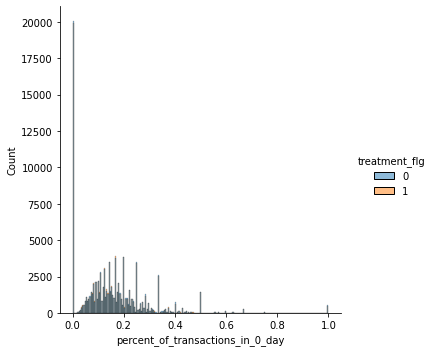

In [48]:
sns.displot(data=df, x='percent_of_transactions_in_0_day', hue='treatment_flg')

In [49]:
for col in all_columns:
    result = stats.ks_2samp(control[col], target[col])
    if result.pvalue < 0.05:
        print(f"{col}:", result)

first_redeem_time: Ks_2sampResult(statistic=0.018043747971904445, pvalue=1.5864821666501067e-14)
issue_redeem_delay: Ks_2sampResult(statistic=0.006630437119458099, pvalue=0.024947293128933627)
percent_of_transactions_in_0_day: Ks_2sampResult(statistic=0.0067970859797160665, pvalue=0.01995771464047112)


### Propensity analysis

#### Causallib

/home/isabella/code/study/diploma/venv/lib/python3.7/site-packages/causallib/utils/stat_utils.py:248: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  extracted = df.lookup(indexer.index, indexer)


Finished loading model, total used 100 iterations


/home/isabella/code/study/diploma/venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/isabella/code/study/diploma/venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/isabella/code/study/diploma/venv/lib/python3.7/site-packages/causallib/utils/stat_utils.py:248: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a sub

Finished loading model, total used 100 iterations


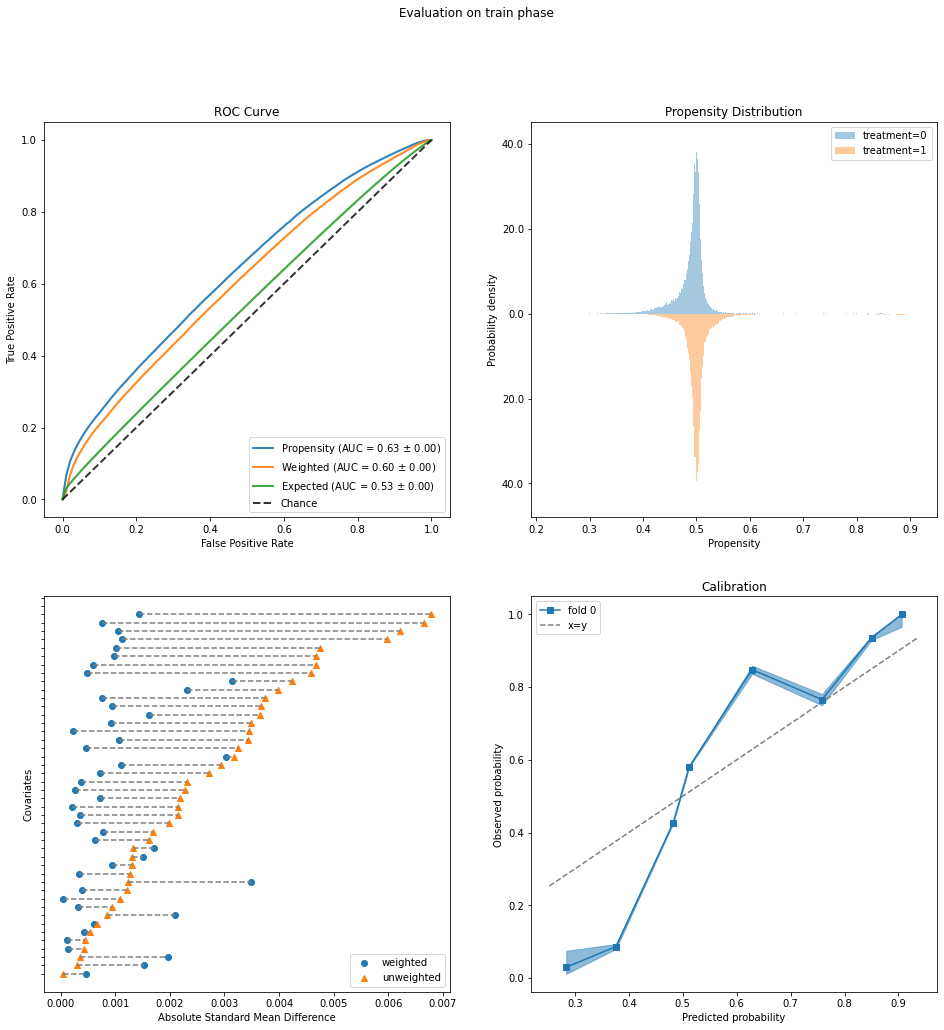

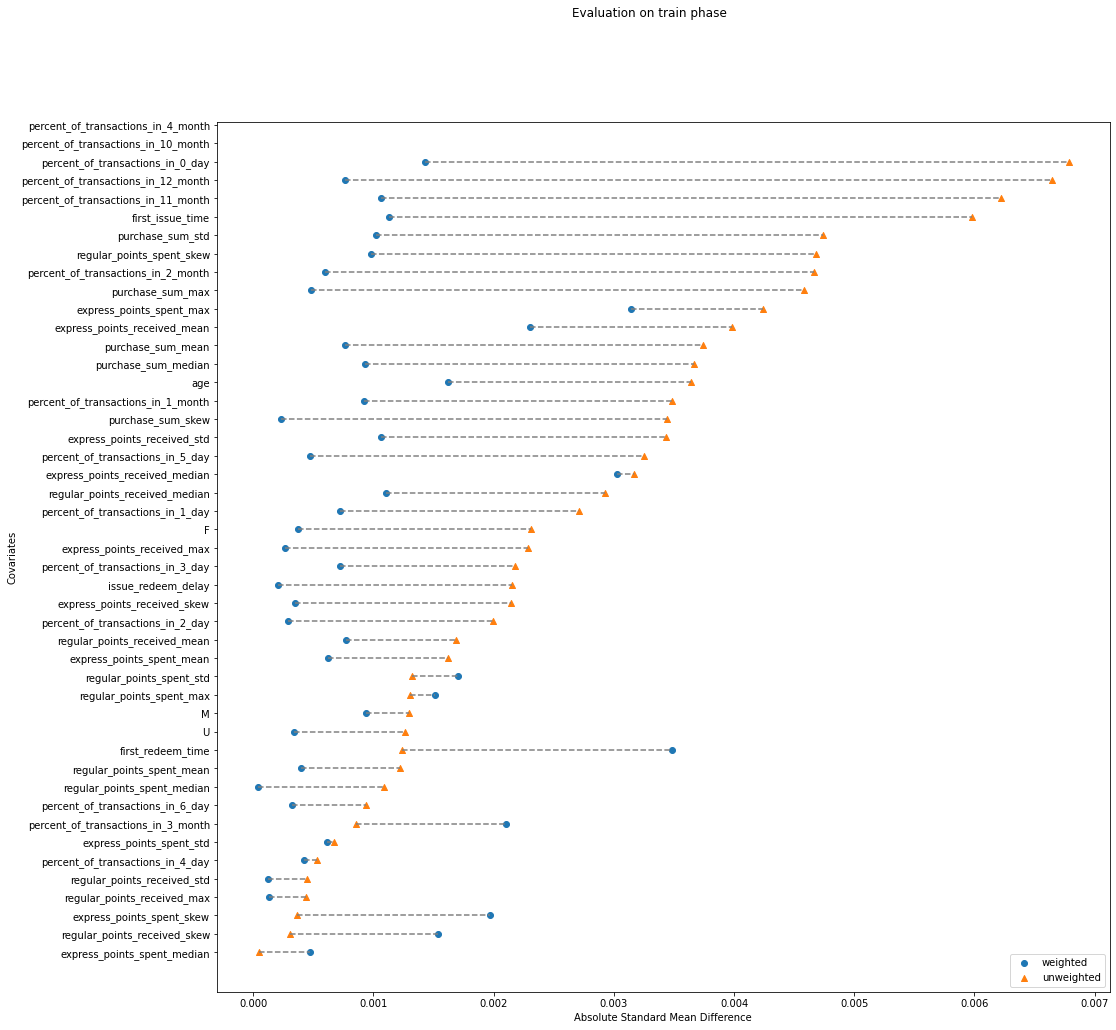

In [50]:
from causallib.evaluation import PropensityEvaluator
from causallib.estimation import IPW

model = lgb.LGBMClassifier()
ipw = IPW(model)
ipw.fit(df[columns], df['treatment_flg'])

evaluator = PropensityEvaluator(ipw)
eval_results = evaluator.evaluate_simple(
    df[columns], df['treatment_flg'], df['target'], 
    plots=["roc_curve", "weight_distribution", "covariate_balance_love", "calibration"]
)
evaluator.evaluate_simple(
    df[columns], df['treatment_flg'], df['target'], 
    plots=["covariate_balance_love"]
)

#### Propensity scores for individuals

In [51]:
model = lgb.LGBMClassifier()

treatment_group = df[df.treatment_flg == 1]

# feature columns
feature_columns = df.columns.difference(['treatment_flg', 'target', 'gender', 'client_id'])

# fit model to differentiate treatment group
model.fit(df[feature_columns], df.treatment_flg)

# get probability of being treated
probas = model.predict_proba(df[feature_columns])

<AxesSubplot:ylabel='Count'>

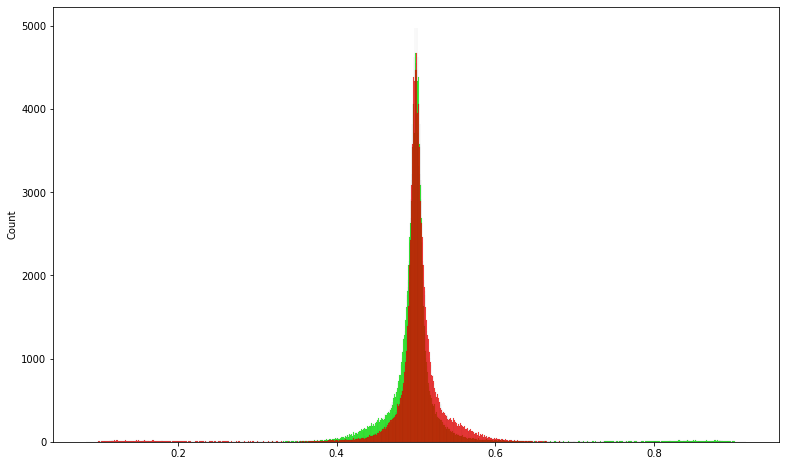

In [52]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.histplot(x=probas[:, 1], ax=ax, color=(0, 1, 0, .1))
sns.histplot(x=probas[:, 0], ax=ax, color=(1, 0, 0, .1))

#### Individuals with low probability of being treated/untreated

In [53]:
ps_threshold = 0.3
low_ps_individuals = df[probas[:, 1] < ps_threshold]
high_ps_individuals = df[probas[:, 0] < ps_threshold]

<AxesSubplot:xlabel='first_redeem_time', ylabel='Count'>

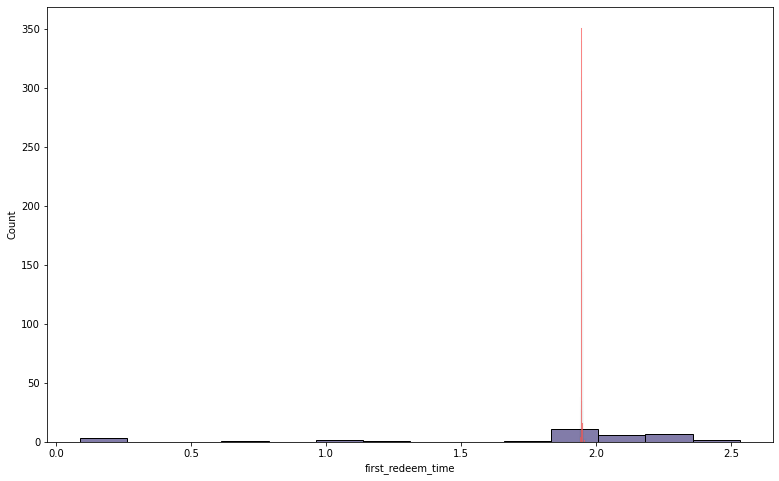

In [58]:
feature = "first_redeem_time"
fig, ax = plt.subplots(figsize=(13, 8))
sns.histplot(x=low_ps_individuals[feature], ax=ax, color="#58508d", label="Low likelyhood of being treated")
sns.histplot(x=high_ps_individuals[feature], ax=ax, color="#ff6361", label="High likelyhood of being treated")

### Propensity score filtering

In [61]:
df_filtered = df[(probas[:, 1] > ps_threshold) & (probas[:, 1] < 1 - ps_threshold)]
df_filtered

,regular_points_received_mean,regular_points_received_std,regular_points_received_median,regular_points_received_max,regular_points_received_skew,express_points_received_mean,express_points_received_std,express_points_received_median,express_points_received_max,express_points_received_skew,...,percent_of_transactions_in_12_month,age,first_issue_time,first_redeem_time,issue_redeem_delay,F,M,U,treatment_flg,target
client_id,,,,,,,,,,,,,,,,,,,,,
000012768d,6.425000,2.973529,6.85,10.0,-0.355890,0.000,0.000000,0.0,0.0,0.000000,...,2,45,0.336675,0.735365,0.398690,0,0,1,0,1
000036f903,1.715625,1.461401,1.30,7.0,2.367965,1.875,10.439558,0.0,60.0,5.388159,...,10,72,0.015925,0.033211,0.017286,1,0,0,1,1
00010925a5,1.766667,1.139688,1.45,5.8,2.321282,0.000,0.000000,0.0,0.0,0.000000,...,6,83,1.303876,1.428140,0.124264,0,0,1,1,1
0001f552b0,5.260000,9.686334,1.60,39.7,2.953750,0.000,0.000000,0.0,0.0,0.000000,...,4,33,0.238463,1.381198,1.142734,1,0,0,1,1
00020e7b18,15.894444,13.081389,14.60,44.5,0.819229,0.000,0.000000,0.0,0.0,0.000000,...,2,73,0.648549,0.751613,0.103064,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe0abb97,2.466667,3.003701,0.70,7.3,0.703218,0.000,0.000000,0.0,0.0,0.000000,...,1,35,0.648236,0.838325,0.190090,1,0,0,0,0
fffe0ed719,2.330000,2.281542,1.50,8.6,1.531437,0.000,0.000000,0.0,0.0,0.000000,...,4,69,0.448229,0.671819,0.223590,0,0,1,0,1
fffea1204c,1.535294,1.710845,0.90,5.9,1.563107,0.000,0.000000,0.0,0.0,0.000000,...,4,73,0.827236,0.918646,0.091409,1,0,0,0,1


The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.


Finished loading model, total used 100 iterations


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.


Finished loading model, total used 100 iterations


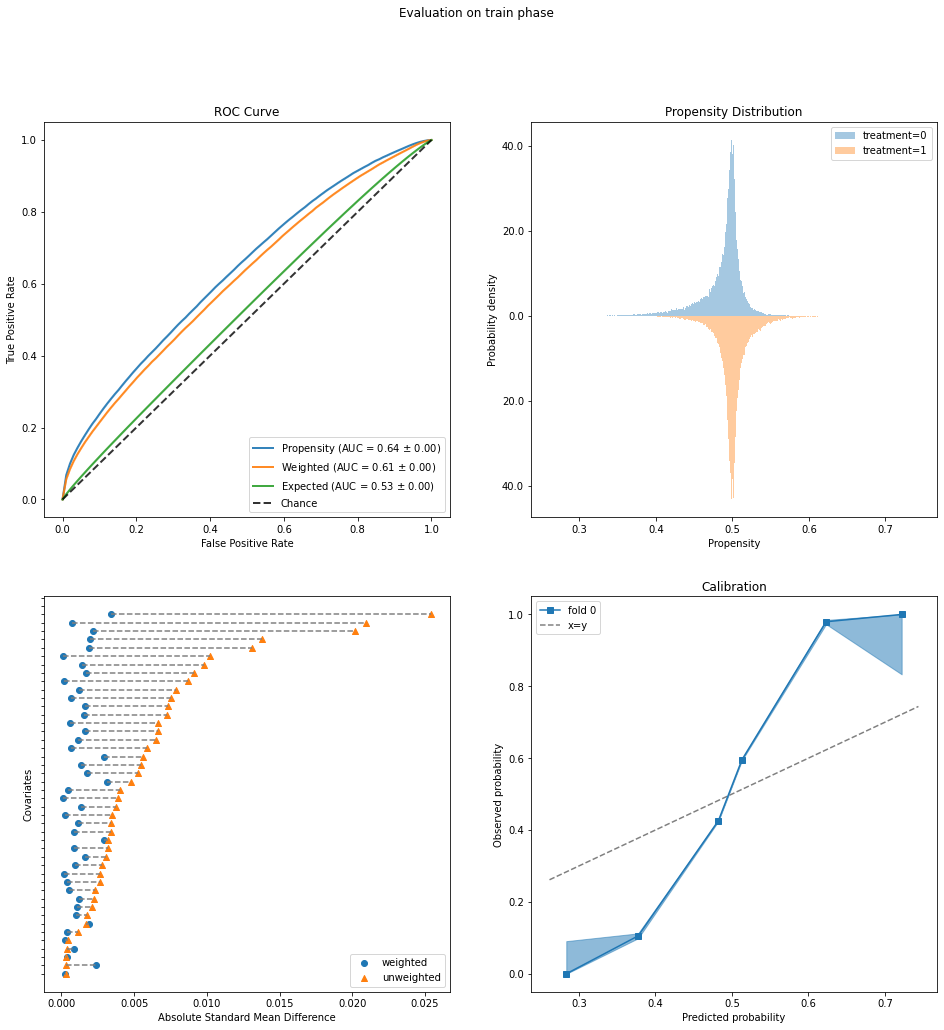

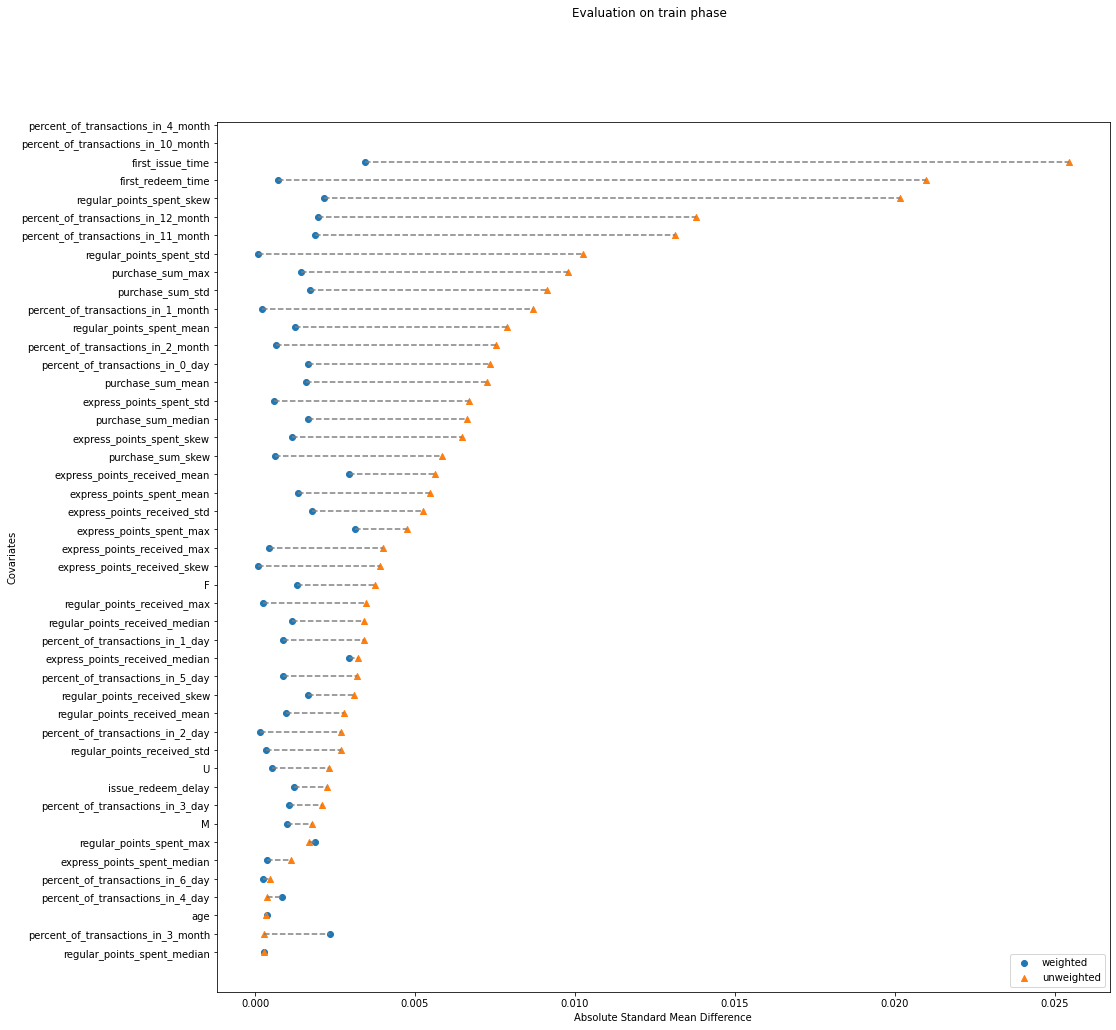

In [90]:
model = lgb.LGBMClassifier()
ipw = IPW(model)
ipw.fit(df_filtered[columns], df_filtered['treatment_flg'])

evaluator = PropensityEvaluator(ipw)
eval_results = evaluator.evaluate_simple(
    df_filtered[columns], df_filtered['treatment_flg'], df_filtered['target'], 
    plots=["roc_curve", "weight_distribution", "covariate_balance_love", "calibration"]
)
evaluator.evaluate_simple(
    df_filtered[columns], df_filtered['treatment_flg'], df_filtered['target'], 
    plots=["covariate_balance_love"]
)

## Train model with propensity scores

In [91]:
from econml.dml import CausalForestDML


In [95]:
train_idx, test_idx = train_test_split(list(range(df.shape[0])), train_size=0.8, stratify=df.treatment_flg, random_state=42)

df_train, df_test = df.iloc[train_idx], df.iloc[test_idx]

# propensity scores
model_ps = lgb.LGBMClassifier()
train_propensity_score = model_ps.fit(df_train[feature_columns], df_train.treatment_flg).predict(df_train[feature_columns])
test_propensity_score = model_ps.predict(df_test[feature_columns])

In [96]:
# causal model
model_y = lgb.LGBMClassifier()
model_t = lgb.LGBMClassifier()

model_causal = CausalForestDML(model_y=model_y, model_t=model_t, cv=1)\
                .fit(Y=df_train.target, 
                     T=df_train.treatment_flg, 
                     X=df_train[feature_columns], 
                     sample_weight=train_propensity_score)

In [98]:
effect = model_causal.effect(X=df_test[feature_columns])
metrics.uplift_at_k(df_test.target, effect, df_test.treatment_flg, strategy="by_group", k = 0.3)

In [113]:
import logging
logging.basicConfig(stream=sys.stdout)

class CausalModelWithPropensityScore:
    def __init__(self, 
                 model_ps, 
                 model_causal, 
                 verbose = logging.DEBUG,
                 stack_ps = False):
        self.model_ps = model_ps
        self.model_causal = model_causal
        self.logger = logging.getLogger()
        self.logger.setLevel(verbose)
        self.stack_ps = stack_ps
        
    def fit(self, x, t, y):
        # learn how to differentiate treatment groups
        self.logger.debug("Running propensity score estimate")
        probas = self.model_ps.fit(x, t).predict_proba(x)
        self.logger.debug("[ok] Done propensity score model fit")
        train_ps = probas[:, 1]
        
        # train causal model
        self.logger.debug("Running causal model fit")
        sample_weight = train_ps
        if self.stack_ps:
            x = np.hstack((x, train_ps.reshape(-1, 1)))
            sample_weight = None
        self.model_causal.fit(X=x, Y=y, T=t, sample_weight=sample_weight)
        self.logger.debug("[ok] Done causal model fit")
        return self
    
    def predict(self, x):
        if self.stack_ps:
            ps = self.model_ps.predict_proba(x)
            ps = ps[:, 1].reshape(-1, 1)
            x = np.hstack((x, ps))
        return self.model_causal.effect(X=x)
    

model_y = lgb.LGBMClassifier()
model_t = lgb.LGBMClassifier()

model = CausalModelWithPropensityScore(
    model_ps = lgb.LGBMClassifier(),
    model_causal = CausalForestDML(model_y=model_y, model_t=model_t)
)
# model.fit(
#     y=df_train.target, 
#     t=df_train.treatment_flg, 
#     x=df_train[feature_columns], 
# )
# effect = model.predict(x=df_test[feature_columns])
# metrics.uplift_at_k(df_test.target, effect, df_test.treatment_flg, strategy="by_group", k = 0.3)

In [110]:
def cross_validate(model, df, metrics: dict, **kfold_params):
    results = defaultdict(list)
    
    for train_index, test_index in KFold(**kfold_params).split(df):
        train_df, test_df = df.iloc[train_index], df.iloc[test_index]
        prediction = model.fit(x=train_df[feature_columns], t=train_df.treatment_flg, y=train_df.target)\
                                          .predict(test_df[feature_columns])
        
        for metric_name, metric_fn in metrics.items():
            results[metric_name].append(metric_fn(prediction, (1, test_df.target, test_df.treatment_flg)))
            
    return results
        
    
metric_fns = {
    'uplift@30': lambda pred, test_tuple: metrics.uplift_at_k(test_tuple[1], pred, test_tuple[2], strategy="by_group", k = 0.3),
    'auuc': lambda pred, test_tuple: metrics.uplift_auc_score(test_tuple[1], pred, test_tuple[2]),
}

### Model with ps as feature

In [117]:
model_y = lgb.LGBMClassifier()
model_t = lgb.LGBMClassifier()

model = CausalModelWithPropensityScore(
    model_ps = lgb.LGBMClassifier(),
    model_causal = CausalForestDML(model_y=model_y, model_t=model_t),
    stack_ps = True
)
cross_validate(model, df, metric_fns, random_state=42, shuffle=True)

DEBUG:root:Running propensity score estimate
DEBUG:root:[ok] Done propensity score model fit
DEBUG:root:Running causal model fit
DEBUG:root:[ok] Done causal model fit
DEBUG:root:Running propensity score estimate
DEBUG:root:[ok] Done propensity score model fit
DEBUG:root:Running causal model fit
DEBUG:root:[ok] Done causal model fit
DEBUG:root:Running propensity score estimate
DEBUG:root:[ok] Done propensity score model fit
DEBUG:root:Running causal model fit
DEBUG:root:[ok] Done causal model fit
DEBUG:root:Running propensity score estimate
DEBUG:root:[ok] Done propensity score model fit
DEBUG:root:Running causal model fit
DEBUG:root:[ok] Done causal model fit
DEBUG:root:Running propensity score estimate
DEBUG:root:[ok] Done propensity score model fit
DEBUG:root:Running causal model fit
DEBUG:root:[ok] Done causal model fit


defaultdict(list,
            {'uplift@30': [0.05327499722868867,
  0.04459194482854645,
  0.029535214202447424,
  0.043790740431221886,
  0.04180209970374582],
 'auuc': [0.01231150149020468,
  0.004735147478645764,
  -0.0019780599555268017,
  0.008500340888593852,
  0.0018079983766748392]})

### Model with ps as a sample_weight

In [118]:
model_y = lgb.LGBMClassifier()
model_t = lgb.LGBMClassifier()

model = CausalModelWithPropensityScore(
    model_ps = lgb.LGBMClassifier(),
    model_causal = CausalForestDML(model_y=model_y, model_t=model_t),
    stack_ps = False
)
cross_validate(model, df, metric_fns, random_state=42, shuffle=True)

DEBUG:root:Running propensity score estimate
DEBUG:root:[ok] Done propensity score model fit
DEBUG:root:Running causal model fit
DEBUG:root:[ok] Done causal model fit
DEBUG:root:Running propensity score estimate
DEBUG:root:[ok] Done propensity score model fit
DEBUG:root:Running causal model fit
DEBUG:root:[ok] Done causal model fit
DEBUG:root:Running propensity score estimate
DEBUG:root:[ok] Done propensity score model fit
DEBUG:root:Running causal model fit
DEBUG:root:[ok] Done causal model fit
DEBUG:root:Running propensity score estimate
DEBUG:root:[ok] Done propensity score model fit
DEBUG:root:Running causal model fit
DEBUG:root:[ok] Done causal model fit
DEBUG:root:Running propensity score estimate
DEBUG:root:[ok] Done propensity score model fit
DEBUG:root:Running causal model fit
DEBUG:root:[ok] Done causal model fit


defaultdict(list,
            {'uplift@30': [0.04174460979935701,
  0.05951637146149724,
  0.05740056089110779,
  0.05465485542370052,
  0.03645260648254922],
 'auuc': [0.01173563713335109,
  0.014657382382015522,
  0.01675539696832188,
  0.01165179082059328,
  0.00804544787715403]})

In [125]:
feature_columns

Index(['F', 'M', 'U', 'age', 'express_points_received_max',
       'express_points_received_mean', 'express_points_received_median',
       'express_points_received_skew', 'express_points_received_std',
       'express_points_spent_max', 'express_points_spent_mean',
       'express_points_spent_median', 'express_points_spent_skew',
       'express_points_spent_std', 'first_issue_time', 'first_redeem_time',
       'issue_redeem_delay', 'percent_of_transactions_in_0_day',
       'percent_of_transactions_in_10_month',
       'percent_of_transactions_in_11_month',
       'percent_of_transactions_in_12_month',
       'percent_of_transactions_in_1_day',
       'percent_of_transactions_in_1_month',
       'percent_of_transactions_in_2_day',
       'percent_of_transactions_in_2_month',
       'percent_of_transactions_in_3_day',
       'percent_of_transactions_in_3_month',
       'percent_of_transactions_in_4_day',
       'percent_of_transactions_in_4_month',
       'percent_of_transactions_in_

In [126]:
df.fillna(0)[['age', 'purchase_sum_max', 'first_issue_time', 'express_points_received_max', 'regular_points_spent_mean']].corr()

,age,purchase_sum_max,first_issue_time,express_points_received_max,regular_points_spent_mean
age,1.000000,-0.085648,-0.046599,0.007256,0.025239
purchase_sum_max,-0.085648,1.000000,-0.124377,0.037789,-0.312576
first_issue_time,-0.046599,-0.124377,1.000000,-0.046722,0.105186
express_points_received_max,0.007256,0.037789,-0.046722,1.000000,-0.014243
regular_points_spent_mean,0.025239,-0.312576,0.105186,-0.014243,1.000000


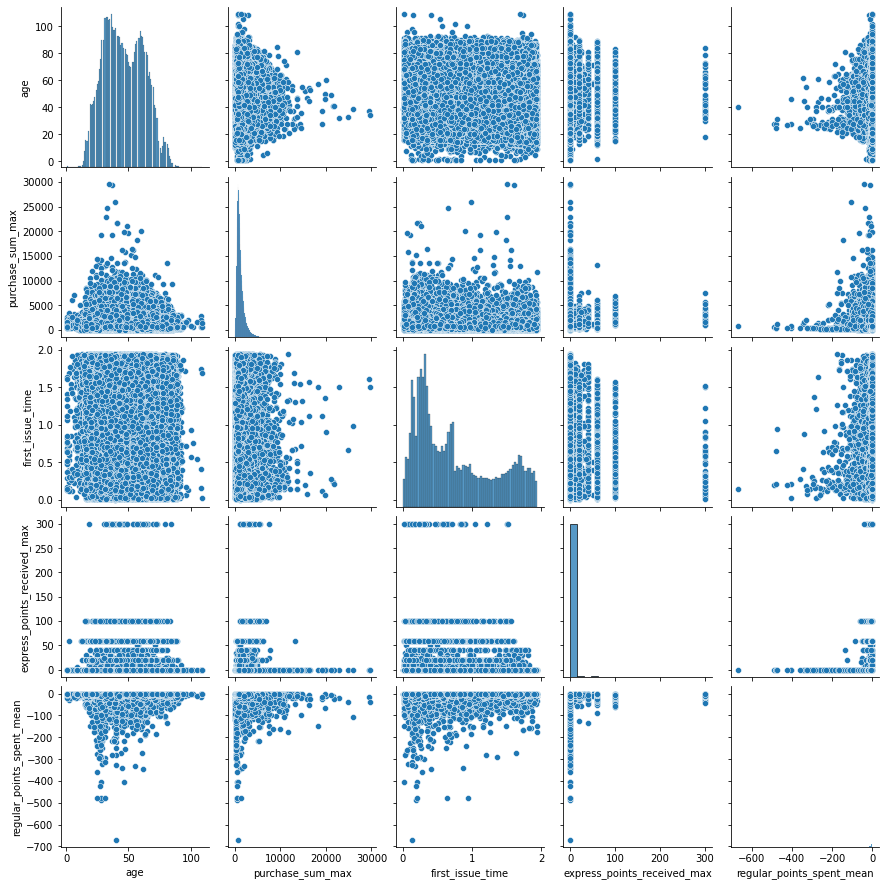

In [129]:
logging.getLogger().setLevel(logging.INFO)

sns.pairplot(data=df[['age', 'purchase_sum_max', 'first_issue_time', 'express_points_received_max', 'regular_points_spent_mean']])